In [1]:
import pandas as pd
data =pd.read_csv("clean_exchange_filled.csv")

In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1826 non-null   object 
 1   ซื้อตั๋วเงิน  1826 non-null   float64
 2   ซื้อเงินโอน   1826 non-null   float64
 3   อัตราขาย      1826 non-null   float64
dtypes: float64(3), object(1)
memory usage: 57.2+ KB


In [3]:
data.describe()

,ซื้อตั๋วเงิน,ซื้อเงินโอน,อัตราขาย
count,1826.000000,1826.000000,1826.000000
mean,33.426934,33.520036,33.852213
std,2.084662,2.084548,2.080083
min,29.550100,29.642700,29.965300
25%,31.513200,31.607200,31.953050
50%,33.496317,33.590150,33.911467
75%,35.041250,35.138675,35.468000
max,38.078100,38.175500,38.500500


In [4]:
from matplotlib import pyplot as plt


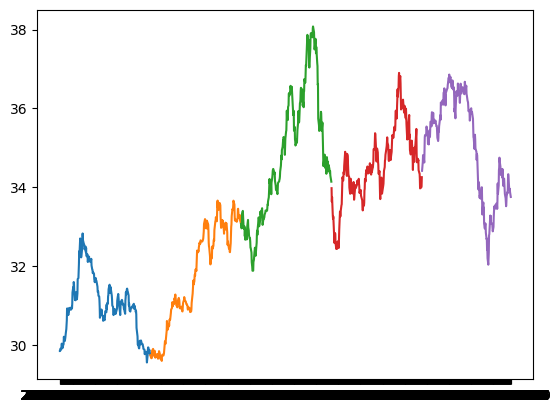

In [5]:
plt.plot(data.iloc[0:366]["Date"],data.iloc[0 :
    366]["ซื้อตั๋วเงิน"])
plt.plot(data.iloc[366:733]["Date"],data.iloc[366:733]["ซื้อตั๋วเงิน"])
plt.plot(data.iloc[733:1099]["Date"],data.iloc[733:1099]["ซื้อตั๋วเงิน"])
plt.plot(data.iloc[1099:1465]["Date"],data.iloc[1099:1465]["ซื้อตั๋วเงิน"])
plt.plot(data.iloc[1466:]["Date"],data.iloc[1466:]["ซื้อตั๋วเงิน"])

plt.show()

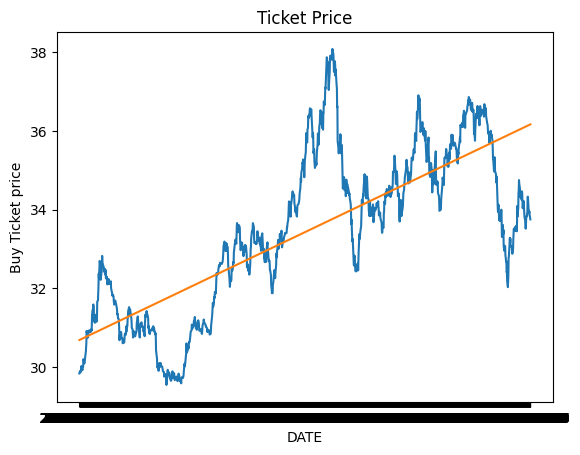

R^2 : 0.5751656754893181


In [6]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress( [x for x in range(0,len(data["ซื้อตั๋วเงิน"]))], data["ซื้อตั๋วเงิน"])
def linear(x):
    return slope*x + intercept
plt.plot(data["Date"],data["ซื้อตั๋วเงิน"])
mymodel = [ d for d in map(linear,[x for x in range(0,len(data["ซื้อตั๋วเงิน"]))] )]
plt.title("Ticket Price" )
plt.xlabel("DATE")
plt.ylabel("Buy Ticket price")
plt.plot(data["Date"],mymodel)
plt.show()
print("R^2 :",r**2)

In [7]:
def plot_linearto(start,end): 
    slope, intercept, r, p, std_err = stats.linregress( [x for x in range(0,len(data["ซื้อตั๋วเงิน"][start:end+1]))], data["ซื้อตั๋วเงิน"][start:end+1])
    def linear(x):
        return slope*x + intercept
    plt.plot(data["Date"][start:end+1],data["ซื้อตั๋วเงิน"][start:end+1])
    mymodel = [ d for d in map(linear,[x for x in range(0,len(data["ซื้อตั๋วเงิน"][start:end+1]))])]
    plt.title("Ticket Price" )
    plt.plot(data["Date"][start:end+1],mymodel,)
    plt.show()
    print("R^2 :",r**2)

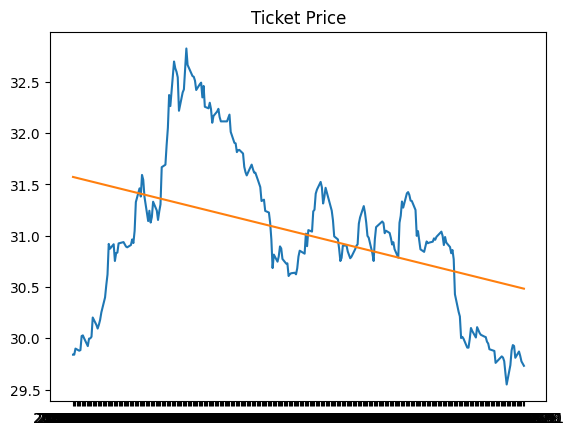

R^2 : 0.16987203190917405


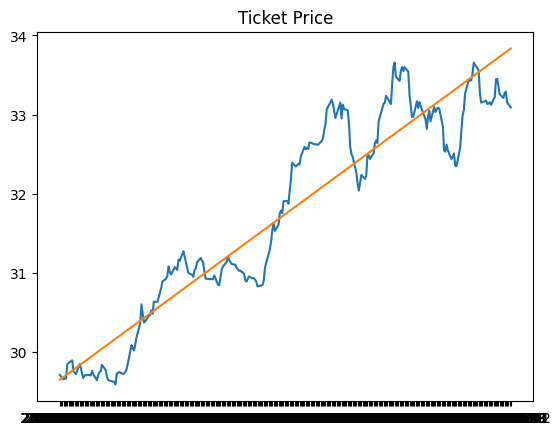

R^2 : 0.8874659926871848


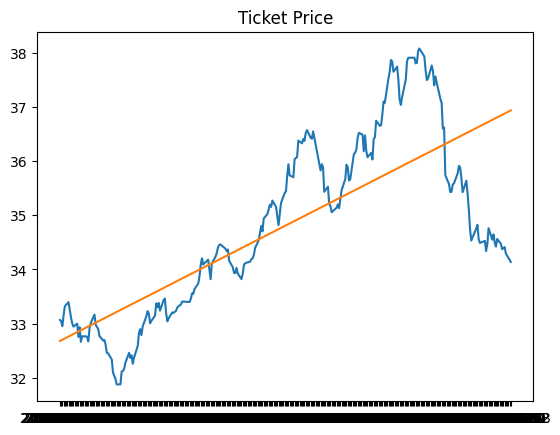

R^2 : 0.5658743132761573


In [8]:
plot_linearto(0,366)
plot_linearto(367,732)
plot_linearto(733,1098)

In [9]:
oildata = pd.read_csv("crude-oil-price.csv")
oildata

,date,price,percentChange,change
0,1983-03-01 00:00:00+00:00,29.2700,NaN,NaN
1,1983-04-01 00:00:00+00:00,30.6300,4.646,1.3600
2,1983-05-01 00:00:00+00:00,30.2500,-1.241,-0.3800
3,1983-06-01 00:00:00+00:00,31.3800,3.736,1.1300
4,1983-07-01 00:00:00+00:00,32.0000,1.976,0.6200
...,...,...,...,...
506,2025-05-01 00:00:00+00:00,60.7900,4.432,2.5800
507,2025-06-01 00:00:00+00:00,65.1100,7.106,4.3200
508,2025-07-01 00:00:00+00:00,69.2600,6.374,4.1500
509,2025-08-01 00:00:00+00:00,64.0100,-7.580,-5.2500


In [10]:
oildata.describe()


,price,percentChange,change
count,511.000000,510.000000,510.000000
mean,46.801648,0.681033,0.067586
std,28.829344,10.404200,4.955975
min,10.420000,-54.245000,-32.830000
25%,20.530000,-5.292000,-1.740000
50%,35.790000,0.924500,0.260000
75%,69.605000,6.275750,2.397500
max,140.000000,88.376000,16.650000


In [11]:
oildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           511 non-null    object 
 1   price          511 non-null    float64
 2   percentChange  510 non-null    float64
 3   change         510 non-null    float64
dtypes: float64(3), object(1)
memory usage: 16.1+ KB


In [12]:
dateT = oildata["date"]
oilprice=oildata["price"]
oilpricech=oildata["percentChange"]


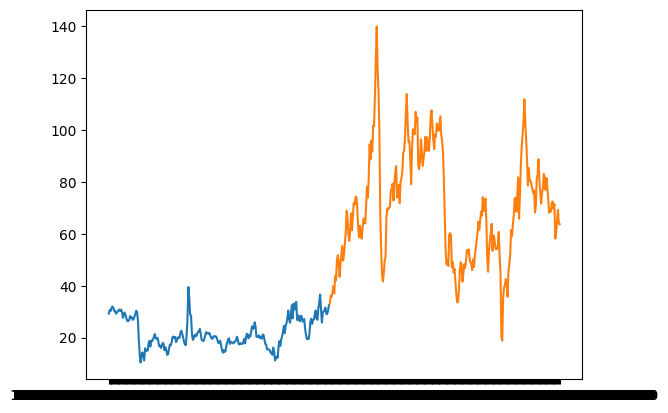

In [13]:
plt.plot(dateT[0:250],oilprice[0:250])
plt.plot(dateT[250:],oilprice[250:])


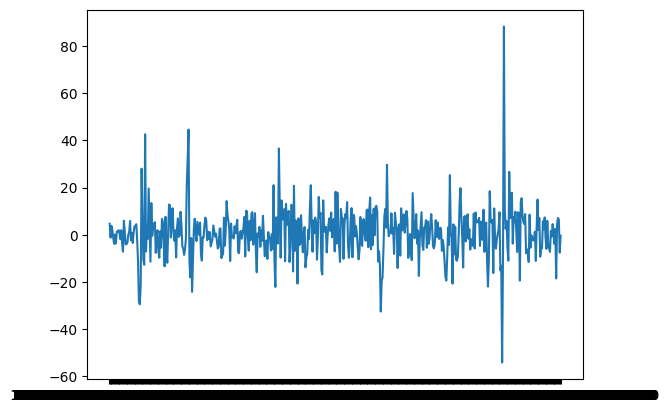

In [14]:
plt.plot(dateT,oilpricech)


In [15]:
def moving_avg( data ,period) :
    moving_avg =[]
    for i in range(0,len(data)) :
        if i < period :
            continue
        else:
            moving_avg.append(sum(data[i-period :i])/period)
    return moving_avg 
    

In [16]:
ma10=moving_avg(oilprice,10)
ma20=moving_avg(oilprice,20)
ma50=moving_avg(oilprice,50)

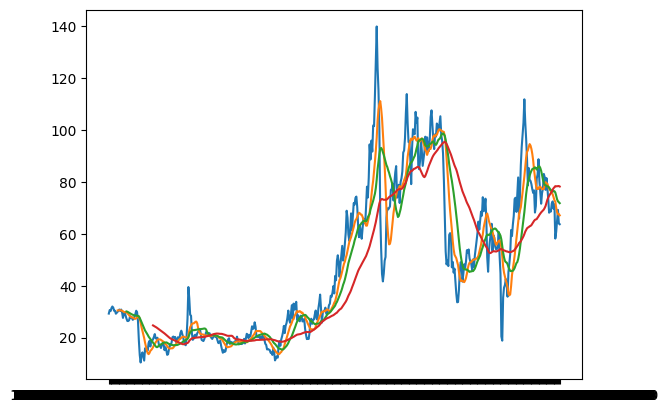

In [17]:



plt.plot(dateT,oilprice)
plt.plot(dateT[10:],ma10)
plt.plot(dateT[20:],ma20)
plt.plot(dateT[50:],ma50)




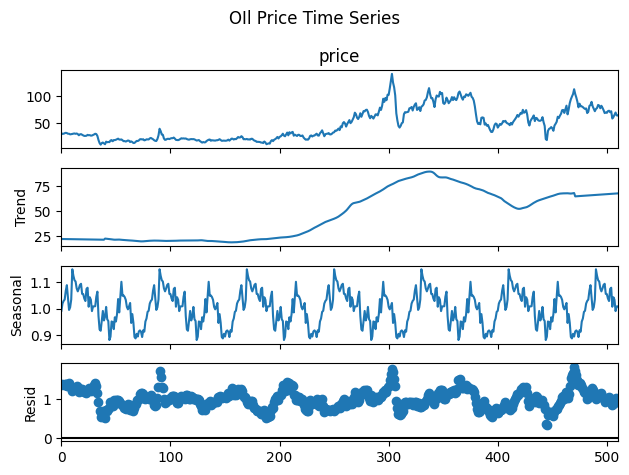

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(
    oilprice, model='multiplicative',period=80, extrapolate_trend='freq')
result.plot()
plt.suptitle('OIl Price Time Series')
plt.tight_layout()
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(oildata["price"][0:120])

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

#Interpreting the results
if (adf_result[1] < 0.05): 
    print("The data is stationary (p-value < 0.05).")
else:
    print("The data is not stationary (p-value >= 0.05).")

ADF Statistic: -3.234244391809423
p-value: 0.01808610122037999
The data is stationary (p-value < 0.05).


/tmp/ipykernel_7907/155552105.py:7: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies


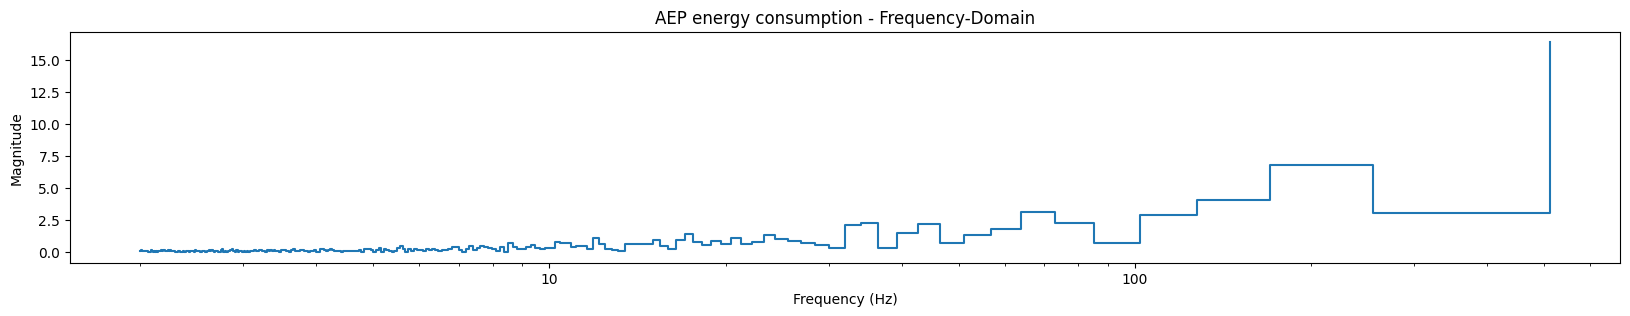

In [20]:
import numpy as np
from numpy import fft

X = fft.fft(oildata["price"])
N = len(X)
frequencies = fft.fftfreq(N, 1)
periods = 1 / frequencies
fft_magnitude = np.abs(X) / N

mask = frequencies >= 0

# Plot the Fourier Transform
fig, ax = plt.subplots(figsize=(20, 3))
ax.step(periods[mask], fft_magnitude[mask]) # Only plot positive frequencies
ax.set_xscale('log')
ax.xaxis.set_major_formatter('{x:,.0f}')
ax.set_title('AEP energy consumption - Frequency-Domain')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
plt.show()
